In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [92]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_solution.csv')

# EDA для общих данных

In [93]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [94]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


Text(0, 0.5, 'Количество зданий')

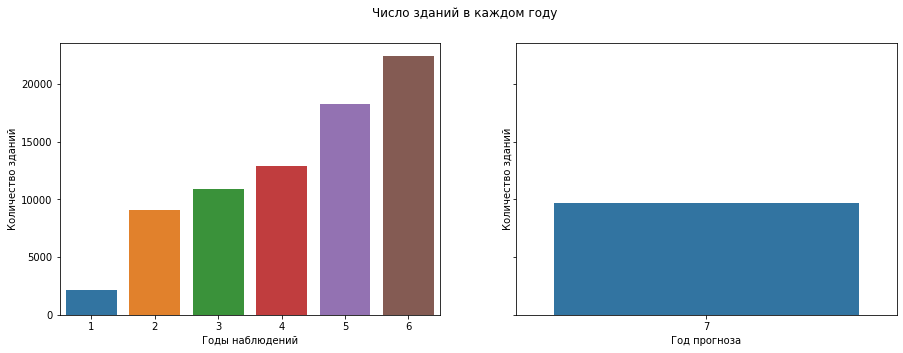

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом году')

sns.countplot(ax=axes[0], data=train, x='Year_Factor')
sns.countplot(ax=axes[1], data=test,x='Year_Factor')
axes[0].set_xlabel('Годы наблюдений')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Год прогноза')
axes[1].set_ylabel('Количество зданий')

Постепенное увеличение данных из года в год.

Следовательно, прогнозируем год №7.

Text(0, 0.5, 'Количество зданий')

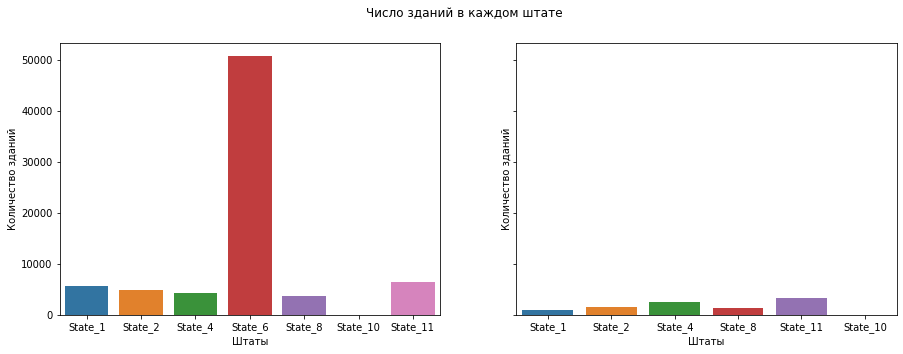

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом штате')

sns.countplot(ax=axes[0], data=train, x='State_Factor')
sns.countplot(ax=axes[1], data=test,x='State_Factor')
axes[0].set_xlabel('Штаты')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Штаты')
axes[1].set_ylabel('Количество зданий')

In [97]:
display(train['State_Factor'].value_counts(), test['State_Factor'].value_counts())

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

State_11    3268
State_4     2568
State_2     1515
State_8     1323
State_1     1027
State_10       4
Name: State_Factor, dtype: int64

Видим, что хоть и большинство зданий находятся в State_6, в прогнозе этого штата нет.

Text(0, 0.5, 'Количество зданий')

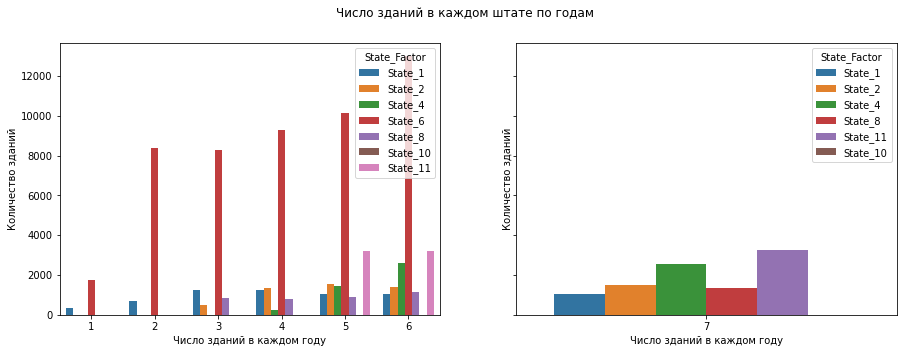

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом штате по годам')

sns.countplot(ax=axes[0], data=train, x='Year_Factor', hue='State_Factor')
sns.countplot(ax=axes[1], data=test, x='Year_Factor', hue='State_Factor')
axes[0].set_xlabel('Число зданий в каждом году')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Число зданий в каждом году')
axes[1].set_ylabel('Количество зданий')


Видно, что что-то произошло в годе №2 такое, что кол-во зданий участвующих в оценке увеличилось 4+ раза.

Ни в обучающей, ни в тестовой выборке дисбаланса классов нет.

Text(0, 0.5, 'Количество')

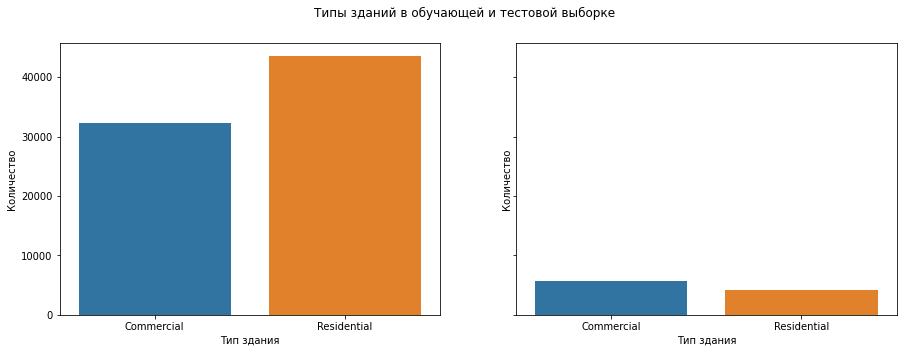

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Типы зданий в обучающей и тестовой выборке')

sns.countplot(ax=axes[0], data=train, x='building_class')
sns.countplot(ax=axes[1], data=test,x='building_class')
axes[0].set_xlabel('Тип здания')
axes[0].set_ylabel('Количество')
axes[1].set_xlabel('Тип здания')
axes[1].set_ylabel('Количество')

Text(0, 0.5, 'Количество')

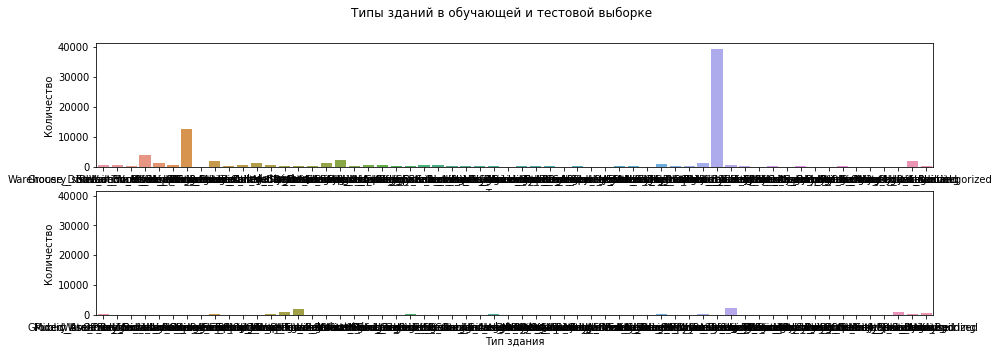

In [100]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Типы зданий в обучающей и тестовой выборке')

sns.countplot(ax=axes[0], data=train, x='facility_type')
sns.countplot(ax=axes[1], data=test,x='facility_type')
axes[0].set_xlabel('Тип здания')
axes[0].set_ylabel('Количество')
axes[1].set_xlabel('Тип здания')
axes[1].set_ylabel('Количество')

In [101]:
display(train['facility_type'].value_counts().head(), test['facility_type'].value_counts().head())

Multifamily_Uncategorized    39455
Office_Uncategorized         12512
Education_Other_classroom     3860
Lodging_Hotel                 2098
2to4_Unit_Building            1893
Name: facility_type, dtype: int64

Multifamily_Uncategorized    2199
Office_Uncategorized         1919
2to4_Unit_Building            966
Education_Other_classroom     890
5plus_Unit_Building           685
Name: facility_type, dtype: int64

Видно, что популярны многоквартирные дома и офисные здания общего назначения.

Text(0, 0.5, 'Количество')

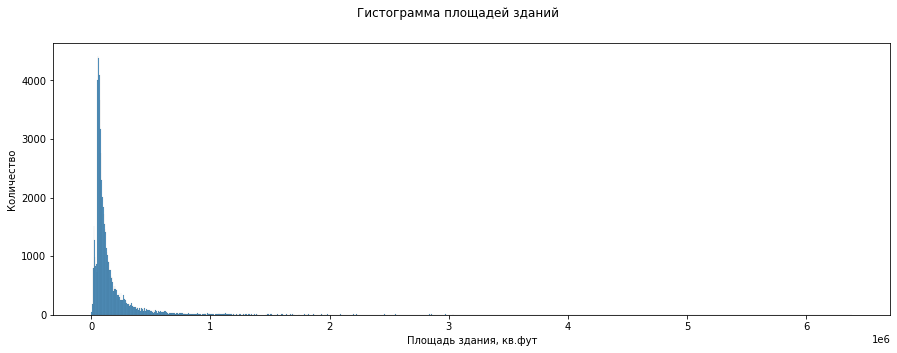

In [102]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма площадей зданий')

sns.histplot(ax=axes, data=train, x='floor_area')
axes.set_xlabel('Площадь здания, кв.фут')
axes.set_ylabel('Количество')

Видим, что большинство зданий имеют площадь меньше 500000кв футов

Можно ожидать высокую корреляцию между энергопотреблением и площадю здания.

In [103]:
min_sq_ft = min(train['floor_area'])
max_sq_ft = max(train['floor_area'])
print("Min Square foot: {}\nMax Square foot: {}".format(min_sq_ft,max_sq_ft))

Min Square foot: 943.0
Max Square foot: 6385382.0


Text(0, 0.5, 'Количество')

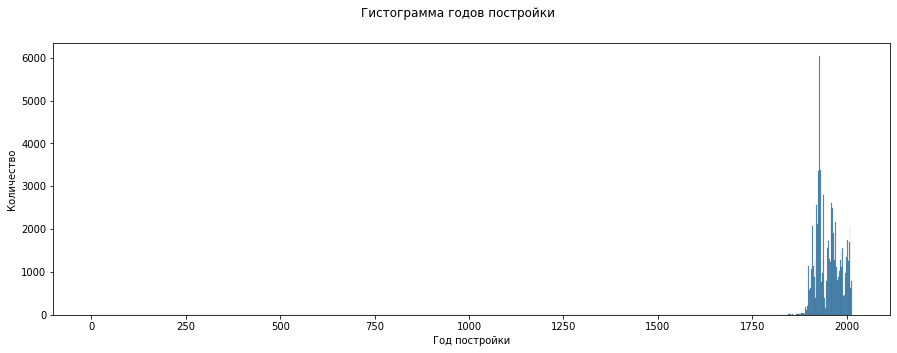

In [104]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма годов постройки')

sns.histplot(ax=axes, data=train, x='year_built')
axes.set_xlabel('Год постройки')
axes.set_ylabel('Количество')

Мы наблюдаем резкий рост числа зданий, построенных примерно в 1960-1980 годах и после 2000 года.

Мы можем ожидать некоторой корреляции с годом выпуска и энергопотреблением, поскольку более новое оборудование обычно обладает большей энергоэффективностью.

In [105]:
min_year = min(train['year_built'])
max_year = max(train['year_built'])
print("Min Year built: {}\nMax Year built: {}".format(min_year,max_year))

Min Year built: 0.0
Max Year built: 2015.0


Видим, что минимальный год равен 0. Врядли дом построен в день рождения Христа, поэтому это должен быть выброс или NaN. Посмотрим.

In [106]:
# Отбросим NaN
temp_a = train.loc[train['year_built'].isna()==False]
display(train.shape, temp_a.shape, train.shape[0] - temp_a.shape[0])

(75757, 64)

(73920, 64)

1837

In [107]:
# Отбросим 0-ые значения
temp_b = temp_a.loc[temp_a['year_built'] > 0]
display(train.shape, temp_b.shape, train.shape[0] - temp_b.shape[0])

(75757, 64)

(73914, 64)

1843

Text(0, 0.5, 'Количество')

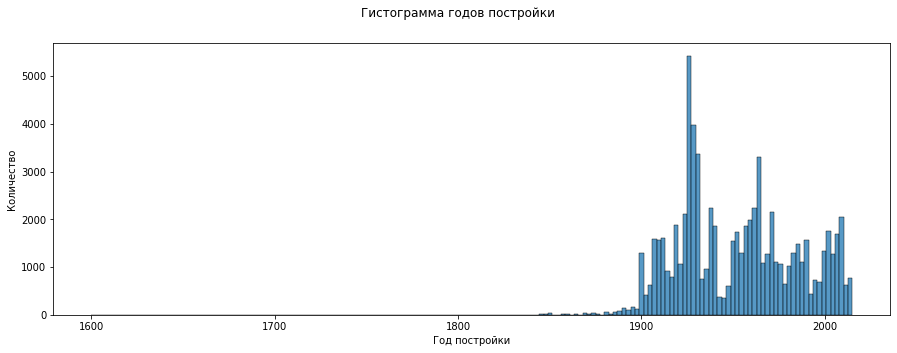

In [108]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма годов постройки')

sns.histplot(ax=axes, data=temp_b, x='year_built')
axes.set_xlabel('Год постройки')
axes.set_ylabel('Количество')

In [109]:
min_year = min(temp_b['year_built'])
max_year = max(temp_b['year_built'])
print("Min Year built: {}\nMax Year built: {}".format(min_year,max_year))

Min Year built: 1600.0
Max Year built: 2015.0


Видно, что гистограмма нормализовалась. Есть здания-ветераны, но их немного.

Text(0, 0.5, 'Количество')

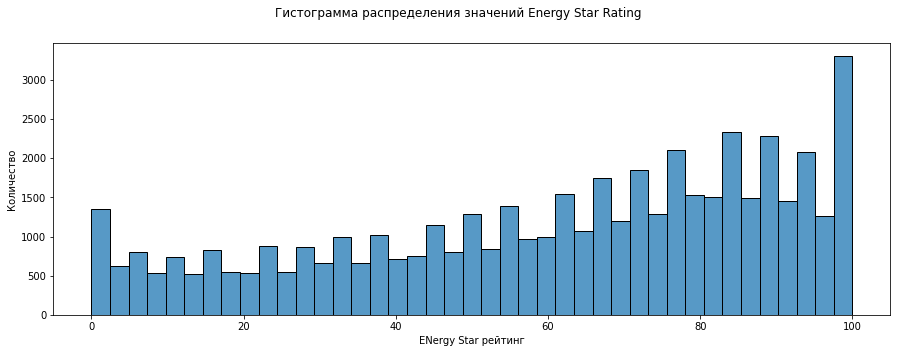

In [110]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма распределения значений Energy Star Rating')

sns.histplot(ax=axes, data=train, x='energy_star_rating')
axes.set_xlabel('ENergy Star рейтинг')
axes.set_ylabel('Количество')

Непонятно, почему так много значений 100 рейтинга. Если обратиться к определению ESR - это оценка, которую владелец здания сам выставляет своему зданию. Думаю, много владельцев смухлевали.

Аналогично, почему 0-вых значений так много.

В контраст рассмотрим таргет переменную.

Text(0, 0.5, 'Количество')

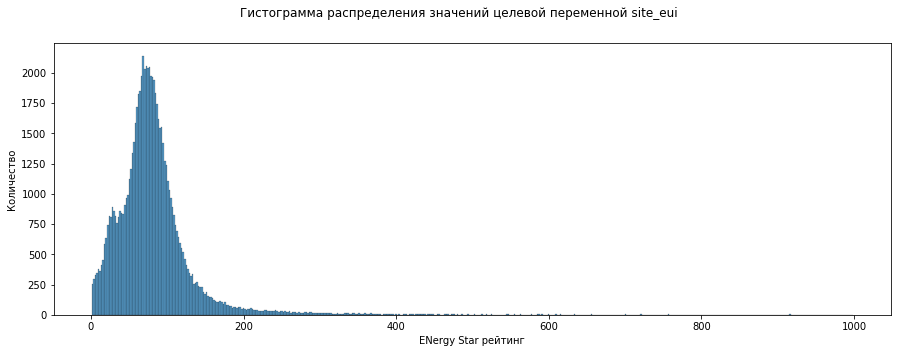

In [111]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма распределения значений целевой переменной site_eui')

sns.histplot(ax=axes, data=train, x='site_eui')
axes.set_xlabel('ENergy Star рейтинг')
axes.set_ylabel('Количество')

In [112]:
train['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

При среднем в ~83 максимальное 997. И на гистограмме видны выбросы. Посмотрим на них

In [113]:
train['site_eui'].dropna().sort_values().tail(20)

57126    900.732240
45003    901.092991
72672    903.667575
65650    904.544309
359      910.563198
17072    916.337619
58024    916.389344
51932    916.909240
9527     933.427176
29583    935.389315
66463    944.895706
30159    945.646313
20326    948.758564
46312    950.306820
9745     962.241793
6781     970.388586
28107    975.452321
55578    989.887978
28951    993.428259
61165    997.866120
Name: site_eui, dtype: float64

Видно, что здания потребляют много больше энергии, чем среднее. Возможно будет иметь смысл логарифмировать таргет.

# Зависимости переменных

Чтобы посмотреть на влияние категориальных переменных на оценку, мы можем построить график плотности, окрашенный значением категориальной переменной. Графики плотности также показывают распределение одной переменной и могут рассматриваться как сглаженная гистограмма. Если мы раскрасим кривые плотности категориальной переменной, это покажет нам, как меняется распределение в зависимости от класса.


Первый график, который мы сделаем, показывает распределение баллов по типу недвижимости. Чтобы не загромождать график, мы ограничим график типами зданий, в наборе данных которых содержится более 100 наблюдений.

In [114]:
# Create a list of buildings with more than 100 measurements
types = train.dropna(subset=['site_eui'])
types = types['facility_type'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'График плотностей распределения целевой переменной от типа здания')

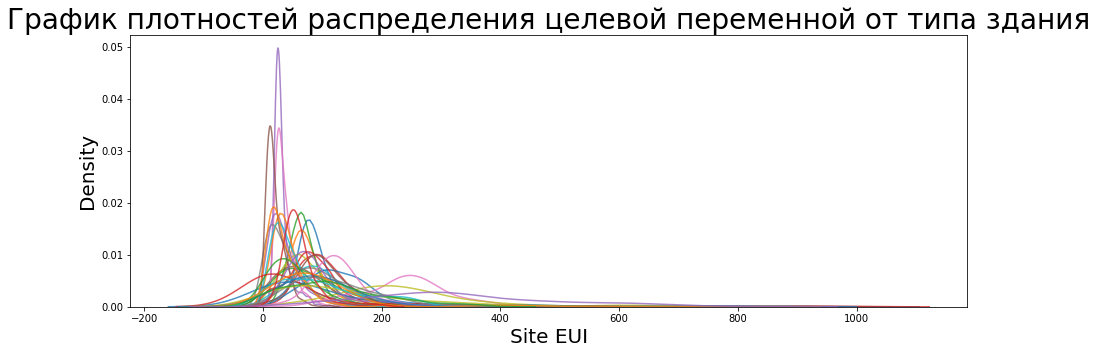

In [115]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

# График каждого здания
for b_type in types:
    # Выбор типа здания
    subset = train[train['facility_type'] == b_type]
    
    # Плотность распределения целевой переменной
    sns.kdeplot(subset['site_eui'].dropna(),
               label = b_type, shade = False, alpha = 0.8)
    
plt.xlabel('Site EUI', size = 20); plt.ylabel('Density', size = 20); 
plt.title('График плотностей распределения целевой переменной от типа здания', size = 28)

Из этого графика мы видим, что тип здания действительно влияет на оценку (отрицательные оценки на графике являются артефактом процедуры оценки плотности ядра). Хотя изначально я собирался сосредоточиться на числовых столбцах для прогнозирования оценки, этот график говорит нам, что мы должны включить тип свойства, потому что эта информация может быть полезна для определения оценки. Поскольку тип здания является категориальной переменной, он должен быть закодирован one-hot-encoding, прежде чем мы сможем ввести его в модель машинного обучения.

Чтобы изучить другую категориальную переменную, район, мы можем построить тот же график, но на этот раз окрашенный районом.

In [116]:
# Create a list of states with more than 100 observations
states = train.dropna(subset=['site_eui'])
states = states['State_Factor'].value_counts()
states = list(states[states.values > 100].index)

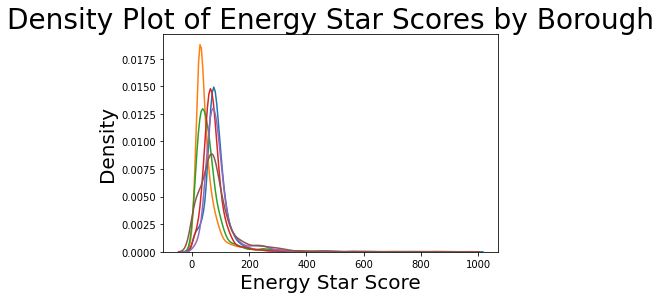

In [117]:
# Plot each borough distribution of scores
for state in states:
    # Select the building type
    subset = train[train['State_Factor'] == state]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['site_eui'].dropna(),
               label = state);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

Штат, по-видимому, не имеет такого существенного значения в распределении баллов, как тип здания. Тем не менее, возможно, имеет смысл включить район в качестве категориальной переменной.

# Корреляции

Чтобы количественно оценить корреляции между признаками (переменными) и целью, мы можем рассчитать коэффициент корреляции Пирсона. Это показатель силы и направления линейной зависимости между двумя переменными: значение -1 означает, что две переменные имеют совершенно отрицательную линейную корреляцию, а значение + 1 означает, что две переменные имеют совершенно положительную линейную корреляцию.


Хотя между объектами и целевыми объектами могут существовать нелинейные взаимосвязи, а коэффициенты корреляции не учитывают взаимодействия между объектами, линейные взаимосвязи являются хорошим способом начать изучение тенденций в данных. Затем мы можем использовать эти значения для выбора функций, которые будут использоваться в нашей модели.

Приведенный ниже код вычисляет коэффициенты корреляции между всеми переменными и оценкой.

In [118]:
# Find all correlations and sort 
correlations_data = train.corr()['site_eui'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

energy_star_rating   -0.511012
january_min_temp     -0.179190
january_avg_temp     -0.167982
february_avg_temp    -0.154071
february_min_temp    -0.147348
march_avg_temp       -0.135303
march_min_temp       -0.134110
april_avg_temp       -0.113008
april_min_temp       -0.111528
february_max_temp    -0.106693
november_min_temp    -0.100349
january_max_temp     -0.097070
october_min_temp     -0.095334
avg_temp             -0.089201
april_max_temp       -0.078969
Name: site_eui, dtype: float64 

august_min_temp         0.091616
september_max_temp      0.098326
july_min_temp           0.108092
september_avg_temp      0.108853
snowdepth_inches        0.113371
precipitation_inches    0.113558
august_avg_temp         0.113786
days_below_20F          0.119492
june_avg_temp           0.122019
cooling_degree_days     0.125004
july_avg_temp           0.133856
days_below_30F          0.139811
heating_degree_days     0.147861
snowfall_inches         0.157284
site_eui                1.000000
Name: s

Существует несколько сильных отрицательных корреляций между функциями и целью. Наиболее отрицательными корреляциями с оценкой являются различные категории Интенсивности энергопотребления (EUI), EUI участка (кБту/фут2) и EUI участка с учетом погодных условий (кБту/фут2) (они незначительно различаются по способу расчета). EUI - это количество энергии, потребляемой зданием, деленное на площадь зданий, и предназначено для измерения эффективности здания, при этом более низкий балл является лучшим. Интуитивно эти корреляции тогда имеют смысл: по мере увеличения EUI оценка Energy Star имеет тенденцию к снижению.

Чтобы учесть возможные нелинейные взаимосвязи, мы можем взять квадратный корень и натуральные логарифмические преобразования признаков, а затем рассчитать коэффициенты корреляции с оценкой. Чтобы попытаться зафиксировать любые возможные взаимосвязи между районом или типом здания (помните, что это категориальные переменные) и оценкой, нам придется закодировать эти столбцы одним нажатием кнопки.

В следующем коде мы берем логарифмические преобразования числовых переменных и преобразования квадратного корня, однократно кодируем две выбранные категориальные переменные (тип здания и район), вычисляем корреляции между всеми функциями и оценкой и отображаем 15 наиболее положительных и 15 наиболее отрицательных корреляций. Это много, но с пандами каждый шаг делать просто!

In [119]:
# Select the numeric columns
numeric_subset = train.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'site_eui':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = train[['State_Factor', 'building_class', 'facility_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['site_eui'])

# Find correlations with the score 
correlations = features.corr()['site_eui'].dropna().sort_values()

C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc

In [120]:
features

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,1,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,0
1,1,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,0,1,0,0,0,0
2,1,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,0
3,1,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,0
4,1,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,...,0,0,0,0,0,0,0,0,0,0
75753,6,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,...,0,0,0,0,0,0,0,0,0,0
75754,6,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,0,0,0,0,0,0,0
75755,6,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Display most negative correlations
correlations.head(15)

sqrt_energy_star_rating   -0.522858
log_energy_star_rating    -0.517689
energy_star_rating        -0.511012
log_days_above_100F       -0.205797
january_min_temp          -0.179190
sqrt_january_min_temp     -0.174533
log_days_above_110F       -0.171566
january_avg_temp          -0.167982
sqrt_january_avg_temp     -0.166089
log_january_avg_temp      -0.162989
log_january_min_temp      -0.160365
february_avg_temp         -0.154071
State_Factor_State_11     -0.149263
sqrt_february_avg_temp    -0.147660
february_min_temp         -0.147348
Name: site_eui, dtype: float64

In [122]:
# Display most positive correlations
correlations.tail(15)

log_cooling_degree_days                       0.138757
days_below_30F                                0.139811
log_heating_degree_days                       0.139954
sqrt_snowdepth_inches                         0.143505
sqrt_heating_degree_days                      0.145462
heating_degree_days                           0.147861
sqrt_days_below_20F                           0.156941
snowfall_inches                               0.157284
sqrt_days_below_30F                           0.157373
log_days_below_30F                            0.158497
facility_type_Laboratory                      0.159372
sqrt_snowfall_inches                          0.175052
facility_type_Health_Care_Inpatient           0.209634
facility_type_Grocery_store_or_food_market    0.209918
site_eui                                      1.000000
Name: site_eui, dtype: float64

После преобразования функций наиболее прочными остаются взаимосвязи, связанные с интенсивностью энергопотребления (EUI). Преобразования логарифма и квадратного корня, похоже, не привели к каким-либо более прочным отношениям. Сильных положительных линейных зависимостей нет, хотя мы видим, что тип здания офиса (Тип наибольшего использования недвижимости_office) слегка положительно коррелирует с оценкой. Эта переменная представляет собой однократное кодированное представление категориальных переменных для типа здания.

Мы можем использовать эти корреляции для того, чтобы выполнить выбор объектов (немного позже). Прямо сейчас давайте построим график наиболее значимой корреляции (с точки зрения абсолютного значения) в наборе данных, который является сайтом EUI (кБту /фут ^ 2). Мы можем раскрасить график по типу здания, чтобы показать, как это влияет на отношения.

# Двухпеременные графики

Чтобы визуализировать взаимосвязь между двумя переменными, мы используем точечный график. Мы также можем включить дополнительные переменные, используя такие аспекты, как цвет маркеров или размер маркеров. Здесь мы построим две числовые переменные друг против друга и будем использовать цвет для представления третьей категориальной переменной.

In [123]:
types = train.dropna(subset=['site_eui'])
types = types['facility_type'].value_counts()
types = list(types[types.values > 100].index)

In [124]:
types

['Multifamily_Uncategorized',
 'Office_Uncategorized',
 'Education_Other_classroom',
 'Lodging_Hotel',
 '2to4_Unit_Building',
 'Commercial_Other',
 '5plus_Unit_Building',
 'Warehouse_Nonrefrigerated',
 'Retail_Uncategorized',
 'Education_College_or_university',
 'Nursing_Home',
 'Education_Uncategorized',
 'Mixed_Use_Commercial_and_Residential',
 'Lodging_Dormitory_or_fraternity_sorority',
 'Warehouse_Distribution_or_Shipping_center',
 'Warehouse_Selfstorage',
 'Grocery_store_or_food_market',
 'Office_Medical_non_diagnostic',
 'Health_Care_Inpatient',
 'Religious_worship',
 'Industrial',
 'Warehouse_Uncategorized',
 'Mixed_Use_Predominantly_Commercial',
 'Parking_Garage',
 'Office_Bank_or_other_financial',
 'Public_Assembly_Library',
 'Public_Safety_Fire_or_police_station',
 'Public_Assembly_Other',
 'Service_Vehicle_service_repair_shop',
 'Retail_Enclosed_mall',
 'Retail_Strip_shopping_mall',
 'Warehouse_Refrigerated',
 'Public_Assembly_Entertainment_culture',
 'Education_Preschool_or

C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


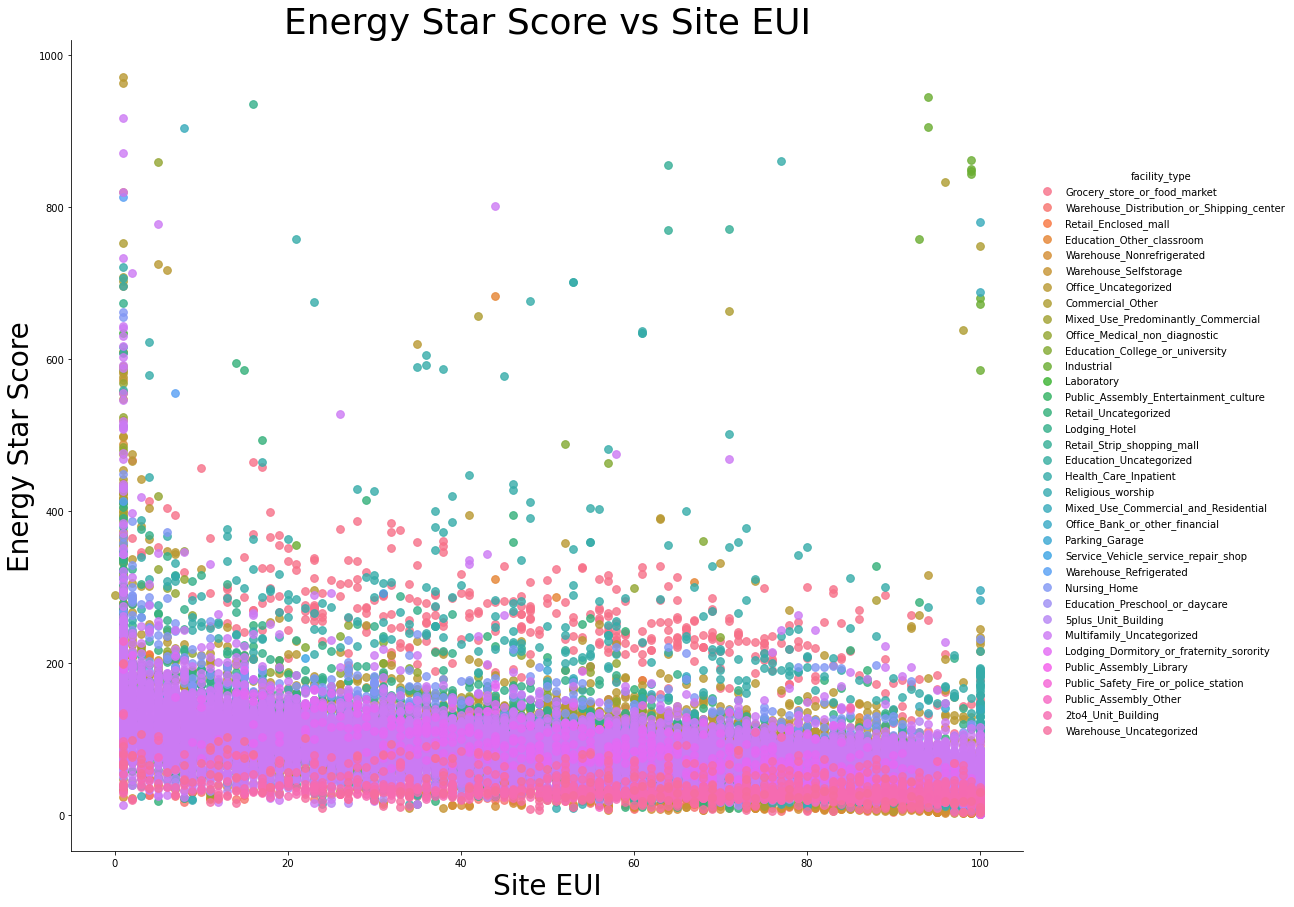

In [125]:

# Extract the building types
features['facility_type'] = train.dropna(subset = ['site_eui'])['facility_type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['facility_type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('energy_star_rating', 'site_eui', 
          hue = 'facility_type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2)

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

In [126]:
features

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized,facility_type
0,1,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,Grocery_store_or_food_market
1,1,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,1,0,0,0,0,Warehouse_Distribution_or_Shipping_center
2,1,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,Retail_Enclosed_mall
3,1,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,...,0,0,0,0,0,0,0,0,0,Education_Other_classroom
4,1,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,...,0,0,0,0,0,1,0,0,0,Warehouse_Nonrefrigerated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,...,0,0,0,0,0,0,0,0,0,Office_Uncategorized
75753,6,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,...,0,0,0,0,0,0,0,0,0,5plus_Unit_Building
75754,6,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,0,0,0,0,0,0,Commercial_Other
75755,6,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,...,0,0,0,0,0,0,0,0,0,Commercial_Other


In [127]:
correlations

sqrt_energy_star_rating                      -0.522858
log_energy_star_rating                       -0.517689
energy_star_rating                           -0.511012
log_days_above_100F                          -0.205797
january_min_temp                             -0.179190
                                                ...   
facility_type_Laboratory                      0.159372
sqrt_snowfall_inches                          0.175052
facility_type_Health_Care_Inpatient           0.209634
facility_type_Grocery_store_or_food_market    0.209918
site_eui                                      1.000000
Name: site_eui, Length: 250, dtype: float64

C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


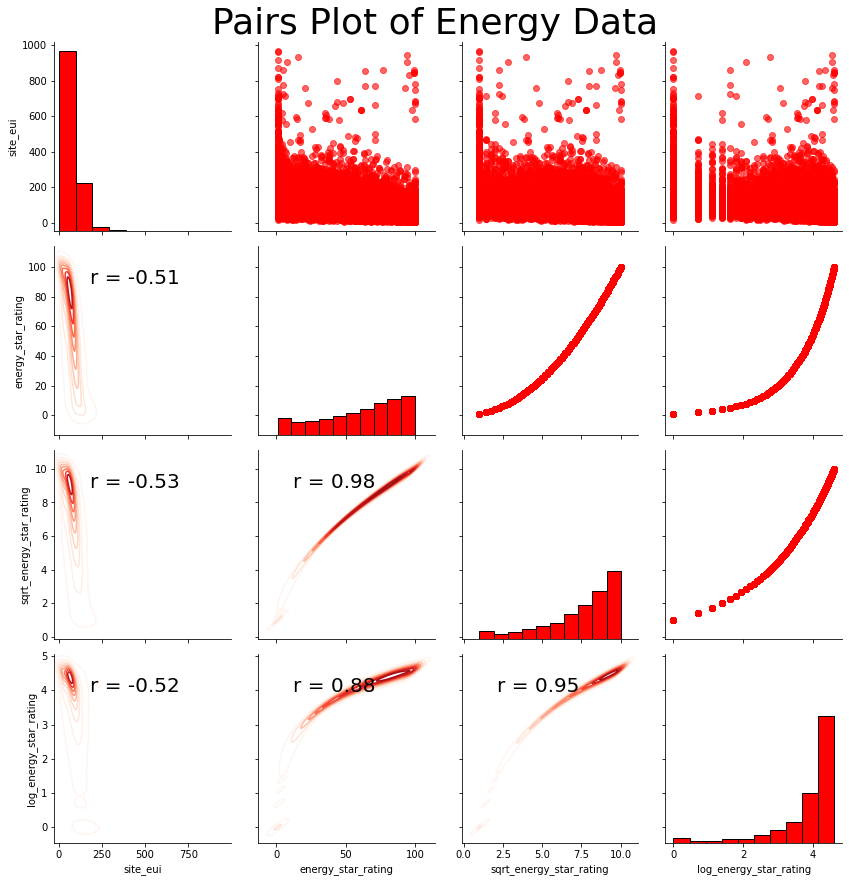

In [128]:
# Extract the columns to  plot
plot_data = features[['site_eui', 'energy_star_rating', 
                      'sqrt_energy_star_rating', 
                      'log_energy_star_rating']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# # Rename columns 
# plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
#                                         'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
#                                         'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

# Feature

In [129]:
# Copy the original data
features = train.copy()

# Select the numeric columns
numeric_subset = train.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'site_eui':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = train[['State_Factor', 'building_class', 'facility_type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)


C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc,

In [130]:
# Copy the original data
featurest = test.copy()

# Select the numeric columns
numeric_subsett = test.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subsett.columns:
    # Skip the Energy Star Score column
    if col == 'site_eui':
        next
    else:
        numeric_subsett['log_' + col] = np.log(numeric_subsett[col])
        
# Select the categorical columns
categorical_subsett = test[['State_Factor', 'building_class', 'facility_type']]

# One hot encode
categorical_subsett = pd.get_dummies(categorical_subsett)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
featurest = pd.concat([numeric_subsett, categorical_subsett], axis = 1)

C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\nizko\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc,

In [132]:
features['site_eui'] = train['site_eui']

In [133]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['site_eui']
    x = x.drop(columns = ['site_eui'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    # x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
    #                       'Water Use (All Water Sources) (kgal)',
    #                       'log_Water Use (All Water Sources) (kgal)',
    #                       'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['site_eui'] = y
               
    return x


In [134]:
features = remove_collinear_features(features, 0.6)

In [135]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(75757, 84)

# Split Into Training and Testing Sets

In [136]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [137]:
no_score = features[features['site_eui'].isna()]
score = features[features['site_eui'].notnull()]

# Separate out the features and targets
features = score.drop(columns='site_eui')
targets = pd.DataFrame(score['site_eui'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(53029, 83)
(22728, 83)
(53029, 1)
(22728, 1)


In [138]:
featurest

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Retail_Uncategorized,facility_type_Retail_Vehicle_dealership_showroom,facility_type_Service_Drycleaning_or_Laundry,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized
0,7,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,...,0,0,0,0,0,0,0,0,0,0
1,7,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,...,0,0,0,0,0,0,0,0,0,0
2,7,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,...,0,0,0,0,0,0,0,0,0,0
3,7,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,...,0,0,0,0,0,0,0,0,0,0
4,7,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,305925.0,2013.0,99.0,812.0,21,38.661290,54,28,41.625000,...,0,0,0,0,0,0,0,0,0,0
9701,7,34909.0,1910.0,94.0,26.5,21,38.661290,54,28,41.625000,...,0,0,0,0,0,0,0,0,0,0
9702,7,42393.0,2014.0,94.0,812.0,21,38.661290,54,28,41.625000,...,0,0,0,0,0,0,0,0,0,0
9703,7,25368.0,1992.0,79.0,812.0,21,38.661290,54,28,41.625000,...,0,0,0,0,0,0,0,0,0,0


# Baseline

In [139]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [140]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 75.23
Baseline Performance on the test set: MAE = 32.9551


In [ ]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)
featurest.to_csv('data/prediction.csv', index=False)